## Tarea de clasificación.

El objetivo de este notebook es mostrar cómo resolver una tarea de clasificación utilizando la librería scikit-learn. Tomaremos como caso de estudio el conjunto de canciones y veremos cómo realizar la preparación de los datos para el algoritmo de árboles de decisión. También conocerás algunas métricas para evaluar un modelo de clasificación y cómo estimar su capacidad de generalización. Además, veremos cómo ajustar los hiperparámetros del algoritmo con técnicas de validación. 
Se explicará paso a paso:

1. Preparar los datos para el modelado.
2. Crear un modelo de árbol de decisión.
3. Utilizar técnicas de validación para el ajuste de hiperparámetros propios de árboles de decisión.
4. Evaluar el modelo.
5. Interpretar el modelo con base en los objetivos de negocio.

### 1. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [ ]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 30) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree

### 2. Carga de los datos
A través de la librería **pandas** podemos realizar la carga de datos desde diferentes fuentes de información, en este caso se realizará la carga de un archivo plano csv (archivo separado por comas).

In [ ]:
# Se cargan los datos. 
datos=pd.read_csv('1datos_lab1.csv', sep=';', encoding = 'utf-8', index_col=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Cantidad de datos y número de variables
datos.shape

(100000, 22)

In [ ]:
# Mostrar los datos
datos.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4


In [ ]:
# Podemos ver los tipos de todas la variables.
datos.dtypes

Diabetes_012             object
HighBP                   object
HighChol                 object
CholCheck                object
BMI                      object
Smoker                   object
Stroke                   object
HeartDiseaseorAttack     object
PhysActivity             object
Fruits                   object
Veggies                  object
HvyAlcoholConsump        object
AnyHealthcare            object
NoDocbcCost              object
GenHlth                  object
MentHlth                 object
PhysHlth                 object
DiffWalk                 object
Sex                      object
Age                      object
Education                object
Income                   object
Unnamed: 22             float64
Unnamed: 23             float64
Unnamed: 24             float64
Unnamed: 25             float64
Unnamed: 26             float64
dtype: object

In [ ]:
# Y hacer una descripción de los datos
datos.describe()

,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Se observa que hay ausencias. Veamos cuantas, para todas las variables:
datos.isnull().sum()

Diabetes_012                16
HighBP                      18
HighChol                     9
CholCheck                   16
BMI                         19
Smoker                      21
Stroke                      13
HeartDiseaseorAttack        13
PhysActivity                15
Fruits                      24
Veggies                     11
HvyAlcoholConsump           12
AnyHealthcare               16
NoDocbcCost                 22
GenHlth                     18
MentHlth                    14
PhysHlth                    22
DiffWalk                    13
Sex                          9
Age                         12
Education                   19
Income                       1
Unnamed: 22             100000
Unnamed: 23             100000
Unnamed: 24             100000
Unnamed: 25             100000
Unnamed: 26             100000
dtype: int64

## Revisaremos los valores que tiene cada columna

In [ ]:
# Lista de nombres de columnas
lista = datos.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=datos.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

Diabetes_012
0      1457
1        32
2       207
-        15
0     82621
1      1860
2     13767
?         8
Xx       17
dtype: int64
--------------------
HighBP
0      1032
1       664
-        19
0     55512
1     42730
?         7
Xx       18
dtype: int64
--------------------
HighChol
0     19104
1     15360
-         8
0     37710
1     27792
?         7
Xx       10
dtype: int64
--------------------
CholCheck
0        34
1      1662
-        15
0      3590
1     94668
?         5
Xx       10
dtype: int64
--------------------
BMI
-31     1
-27     1
-23     1
-17     1
-15     1
       ..
95     10
96      1
98      7
?       5
Xx     12
Length: 143, dtype: int64
--------------------
Smoker
0       998
1       698
-        15
0     54428
1     43809
?        11
Xx       20
dtype: int64
--------------------
Stroke
0      1645
1        51
-        13
0     94173
1      4086
?         3
Xx       16
dtype: int64
--------------------
HeartDiseaseorAttack
0      1565
1       131
-        

### 2. Limpieza y preparación de los datos

Primero vamos a ejecutar los pasos de limpieza de los datos, relacionados el tratamiento de ausencias y registros duplicados.

In [ ]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
datos_t = datos

In [ ]:
# Primero eliminaremos aquellas variables con muchas ausencias.
#Eliminar columnas vacías
datos_t = datos_t.drop(["Unnamed: 22","Unnamed: 23","Unnamed: 24","Unnamed: 25","Unnamed: 26"],axis=1)

In [ ]:
# Eliminación registros con ausencias
datos_t = datos_t.dropna()
# Eliminación de registros duplicados.
datos_t = datos_t.drop_duplicates()

In [ ]:
datos_t.shape

(95672, 22)

In [ ]:
#Eliminaremos las filas que contienen datos como: Xx, ?, -
columnas = datos_t.columns.tolist()
for i in columnas:
  # Get names of indexes for which column Stock has value Xx
  indexNames = datos_t[ datos_t[i] == 'Xx'].index
  # Delete these row indexes from dataFrame
  datos_t.drop(indexNames , inplace=True)
  # Get names of indexes for which column Stock has value ?
  indexNames = datos_t[ datos_t[i] =="?"].index
  # Delete these row indexes from dataFrame
  datos_t.drop(indexNames , inplace=True)
  # Get names of indexes for which column Stock has value -
  indexNames = datos_t[datos_t[i] =="-"].index
  # Delete these row indexes from dataFrame
  datos_t.drop(indexNames , inplace=True)

In [ ]:
#Verificar que se limpíaron bien
# Lista de nombres de columnas
lista = datos_t.columns.tolist()

#Revisar diferentes valores que hay en las columnas para continuar limpieza
for i in lista:
  datos_ver=datos_t.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

#se obsera que hay valores iguales que aparecen dos veces

Diabetes_012
0     1447
1       32
2      207
0    77814
1     1846
2    13592
dtype: int64
--------------------
HighBP
0     1023
1      663
0    51516
1    41736
dtype: int64
--------------------
HighChol
0    18299
1    15134
0    34799
1    26706
dtype: int64
--------------------
CholCheck
0       34
1     1652
0     3539
1    89713
dtype: int64
--------------------
BMI
-31     1
-27     1
-23     1
-17     1
-15     1
       ..
91      1
92     31
95     10
96      1
98      7
Length: 140, dtype: int64
--------------------
Smoker
0      988
1      698
0    50600
1    42652
dtype: int64
--------------------
Stroke
0     1635
1       51
0    89214
1     4038
dtype: int64
--------------------
HeartDiseaseorAttack
0     1555
1      131
0    84181
1     9071
dtype: int64
--------------------
PhysActivity
0     8802
1    24631
0    14716
1    46789
dtype: int64
--------------------
Fruits
0.0    12850
1.0    20583
0      22597
1      38908
dtype: int64
--------------------
Veggies
0    

In [ ]:
# Transformamos todos los datos en floats
for (col, i) in datos_t.iteritems():
    datos_t[col] = pd.to_numeric(datos_t[col], errors='coerce')

#Verificar que se convirtieron bien
# Lista de nombres de columnas
lista = datos_t.columns.tolist()

#Revisar diferentes valores que hay en las columnas para continuar limpieza
for i in lista:
  datos_ver=datos_t.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

Diabetes_012
0    79261
1     1878
2    13799
dtype: int64
--------------------
HighBP
0    52539
1    42399
dtype: int64
--------------------
HighChol
0    53098
1    41840
dtype: int64
--------------------
CholCheck
0     3573
1    91365
dtype: int64
--------------------
BMI
-35    22
-33    20
-31    15
-29    24
-27    16
       ..
 91     1
 92    31
 95    10
 96     1
 98     7
Length: 92, dtype: int64
--------------------
Smoker
0    51588
1    43350
dtype: int64
--------------------
Stroke
0    90849
1     4089
dtype: int64
--------------------
HeartDiseaseorAttack
0    85736
1     9202
dtype: int64
--------------------
PhysActivity
0    23518
1    71420
dtype: int64
--------------------
Fruits
0.0    35447
1.0    59491
dtype: int64
--------------------
Veggies
0    18230
1    76708
dtype: int64
--------------------
HvyAlcoholConsump
0    89326
1     5612
dtype: int64
--------------------
AnyHealthcare
0     4895
1    90043
dtype: int64
--------------------
NoDocbcCost
0    86

Ahora se nota que hay variables con valores fuera del rango establecido en el codebook, tales como BMI, MentHlth y PhysHlth que presentan valores negativos.

In [ ]:
#Eliminaremos las filas que contienen datos fuera de rango en BMI, MentHlth y PhysHlth 
datos_t = datos_t.drop(datos_t[datos_t['BMI']<=1].index)
datos_t = datos_t.drop(datos_t[datos_t['MentHlth']<=1].index)
datos_t = datos_t.drop(datos_t[datos_t['PhysHlth']<=1].index)

In [ ]:
#Verificar que se los datos estén en rango
# Lista de nombres de columnas
lista = datos_t.columns.tolist()

#Revisar diferentes valores que hay en las columnas para continuar limpieza
for i in lista:
  datos_ver=datos_t.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

Diabetes_012
0    10726
1      421
2     3208
dtype: int64
--------------------
HighBP
0    6562
1    7793
dtype: int64
--------------------
HighChol
0    6759
1    7596
dtype: int64
--------------------
CholCheck
0      461
1    13894
dtype: int64
--------------------
BMI
13     1
14     5
15    13
16    40
17    51
      ..
87    10
89     1
92     3
95     4
98     2
Length: 75, dtype: int64
--------------------
Smoker
0    6676
1    7679
dtype: int64
--------------------
Stroke
0    13112
1     1243
dtype: int64
--------------------
HeartDiseaseorAttack
0    12031
1     2324
dtype: int64
--------------------
PhysActivity
0    5407
1    8948
dtype: int64
--------------------
Fruits
0.0    6151
1.0    8204
dtype: int64
--------------------
Veggies
0     3425
1    10930
dtype: int64
--------------------
HvyAlcoholConsump
0    13577
1      778
dtype: int64
--------------------
AnyHealthcare
0      941
1    13414
dtype: int64
--------------------
NoDocbcCost
0    11454
1     2901
dtype:

In [ ]:
# Cantidad de datos y número de variables
datos_t.shape

(14355, 22)

Es muy importante analizar el objetivo del modelo analítico a construir antes de iniciar a tomar decisiones. En este caso, por ejemplo, se debe aplicar la regla dada por el negocio, sobre qué significa que un paciente sea diabético o que no, para generar la nueva variable que será la clase (variable objetivo).

Esta nueva columna la derivaremos a partir de la variable "Diabetes_012". Si el valor en esta variable se clasifica como "diabético"  será indicado con un "1", de lo contrario será "no diabético y esta categoría la representaremos con un "0". Como en este caso también se cuenta con la clase prediabética y contiene muy pocos valores, se sumarán a la clase diabética.

In [ ]:
# Podemos ver los estadísticos de la variable "Diabetes_012"
datos_t['Diabetes_012'].describe()

count    14355.000000
mean         0.476280
std          0.834529
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: Diabetes_012, dtype: float64

In [ ]:
datos_ver=datos_t.groupby(["Diabetes_012"]).size()
datos_ver

Diabetes_012
0    10726
1      421
2     3208
dtype: int64

In [ ]:
# Ahora definimos la función que nos va a permitir construir nuestra clase.
def label_diabetes (row):
    if row['Diabetes_012'] > 1 :
        return 1
    return 0
datos_t['diabetes_label']=datos_t.apply (lambda row: label_diabetes(row), axis=1)    

In [ ]:
#Podemos ver la cantidad de datos en cada categoría de la nueva clase
datos_ver=datos_t.groupby(["diabetes_label"]).size()
datos_ver

diabetes_label
0    10726
1     3629
dtype: int64

In [ ]:
#Eliminar columna Diabetes_012
datos_t = datos_t.drop(["Diabetes_012"],axis=1)

In [ ]:
datos_t.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,diabetes_label
0,1,1,1,40,1,0,0,0,0.0,1,0,1,5,18,15,1,0,9,4,3,0
2,1,1,1,28,0,0,0,0,1.0,0,0,1,5,30,30,1,0,9,4,8,0
8,1,1,1,30,1,0,1,0,1.0,1,0,1,5,30,30,1,0,9,5,1,1
14,0,1,1,33,1,1,0,1,0.0,1,0,1,4,30,28,0,0,4,6,2,0
21,1,1,1,38,1,0,0,0,1.0,1,0,1,5,15,30,1,0,13,2,3,0


In [ ]:
# Cantidad de datos de cada clase
pd.value_counts(datos_t['diabetes_label'])

0    10726
1     3629
Name: diabetes_label, dtype: int64

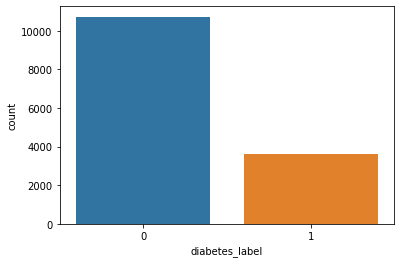

In [ ]:
# También podemos vizualizar las proporciones con un diagrama de barras.
ax = sns.countplot(x='diabetes_label', data=datos_t)

Los datos se ven muy desbalanceados,por esta razón es necesario aplicar un algoritmo como SMOTE que permita tener una mejor distribución de estos.

In [ ]:
# Eliminaremos las variables que consideramos no son útiles para la tarea que queremos resolver, como NoDocbcCost.
datos_t = datos_t.drop(['NoDocbcCost'], axis=1)
datos_t = datos_t.drop(['Diabetes_012'], axis=1)
datos_t = datos_t.drop(['Education'], axis=1)
datos_t = datos_t.drop(['CholCheck'], axis=1)
datos_t = datos_t.drop(['GenHlth'], axis=1)

Un aspecto muy importante para tener en cuenta son los requerimientos de entrada de los algoritmos de aprendizaje implementados en las librerías utilizadas. En particular, scikit-learn requiere que todos los atributos sean numéricos y que la variable objetivo, en una tarea de clasificación, esté codificada con números.

In [ ]:
# Vamos a seleccionar de nuestro conjunto solo los atributos numéricos.
number_cols = datos_t.dtypes[(datos_t.dtypes == np.int64) | (datos_t.dtypes == np.float64)].index 
number_cols = datos_t.select_dtypes(include = ['int64','float']).columns
number_cols

Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Income', 'diabetes_label'],
      dtype='object')

In [ ]:
datos_m = datos_t[number_cols]

In [ ]:
# Podemos ver como quedaron los datos
datos_m.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,diabetes_label
0,1,1,1,40,1,0,0,0,0.0,1,0,1,5,18,15,1,0,9,4,3,0
2,1,1,1,28,0,0,0,0,1.0,0,0,1,5,30,30,1,0,9,4,8,0
8,1,1,1,30,1,0,1,0,1.0,1,0,1,5,30,30,1,0,9,5,1,1
14,0,1,1,33,1,1,0,1,0.0,1,0,1,4,30,28,0,0,4,6,2,0
21,1,1,1,38,1,0,0,0,1.0,1,0,1,5,15,30,1,0,13,2,3,0


In [ ]:
# Revisión del total de registros
datos_m.shape

(14355, 21)

### 3. Construcción del modelo con árboles de decisión

In [ ]:
# Se selecciona la variable objetivo, en este caso "diabetes_label".
Y = datos_m['diabetes_label']
# Del conjunto de datos se elimina la variable "diabetes_label"
X = datos_m.drop(['diabetes_label'], axis=1)

Utilizamos SMOTE para balancear los datos

In [ ]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

In [ ]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=0)

# Crear el objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía.
arbol = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Entrenar el modelo de arbol de decisión con los datos de entrenamiento
arbol = arbol.fit(X_train,Y_train)

In [ ]:
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = arbol.predict(X_test)

# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

In [ ]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(arbol, X_test, Y_test)  
plt.show()

In [ ]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

In [ ]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

In [ ]:
# Calculemos también las métricas de rendimiento sobre el conjunto de entrenamiento.
y_pred = arbol.predict(X_train)
print('Exactitud: %.2f' % accuracy_score(Y_train, y_pred))
print("Recall: {}".format(recall_score(Y_train,y_pred)))
print("Precisión: {}".format(precision_score(Y_train,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_train,y_pred)))

###3.1 Interpretación del modelo. Aplica para árboles de decisión

In [ ]:
# Obtener la importancia de las variables. Para esto podemos utilizar uno de los atributos del modelo "feature_importances_", el
# cual nos devuelve un coeficiente o peso para cada atributo: mientras más grande sea este más importante será la variable
# asociada.
importancia = arbol.feature_importances_
importancia

In [ ]:
# importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

In [ ]:
# Además, podemos visualizar el árbol.
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol, max_depth=3, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)

### 3.2. Construcción del modelo con búsqueda de hiperparámetros.

In [ ]:
# Dividimos el conjunto de entrenamiento en dos: una para la construcción del modelo (sería el nuevo conjunto de 
# entrenamiento) y otro para la validación, el cuál será utilizado para determinar el rendimiento del modelo con una
# combinación específica de hiperparámetros.
X_trainval, X_val, Y_trainval, Y_val = train_test_split(X_train, Y_train, test_size = 0.15, random_state = 0)

In [ ]:
# Fijemos un valor de max_depth en 2, construyamos el modelo y probemos sobre validación. Utilicemos la exactitud como métrica 
# de rendimiento para hacer la selección.
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 4, random_state=0)
arbol = arbol.fit(X_train,Y_train)

In [ ]:
# Determinemos los valores de exactitud sobre entrenamiento y test
y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

In [ ]:
# Ahora probemos con otro valor de profundidad de árbol.
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 6, random_state=0)
arbol = arbol.fit(X_train,Y_train)
y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

In [ ]:
# Ahora probemos con otro valor de profundidad de árbol.
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 8, random_state=0)
arbol = arbol.fit(X_train,Y_train)
y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

In [ ]:
# Ahora probemos con otro valor de profundidad de árbol.
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 10, random_state=0)
arbol = arbol.fit(X_train,Y_train)
y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

In [ ]:
# Ahora probemos con otro valor de profundidad de árbol.
arbol = DecisionTreeClassifier(criterion='entropy', max_depth = 20, random_state=0)
arbol = arbol.fit(X_train,Y_train)
y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

In [ ]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [ ]:
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,20],'min_samples_split':[2, 3, 4, 5]}

In [ ]:
# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(random_state=0)

In [ ]:
# Podemos ver cuál fue el resultado de la búsqueda (mejores valores de hiperparámetros)
mejor_modelo.best_params_

In [ ]:
# Obtener el mejor modelo.
arbol_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = arbol_final.predict(X_train)
y_pred_test = arbol_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

In [ ]:
print(classification_report(Y_test, y_pred_test))

### 4. Construcción del modelo con KNN.



In [ ]:
# Se selecciona la variable objetivo, en este caso "diabetes_label".
Y = datos_m['diabetes_label']
# Del conjunto de datos se elimina la variable "diabetes_label"
X = datos_m.drop(['diabetes_label'], axis=1)

# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Utilicemos un número de vecinos = 3 
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn = modelo_knn.fit(X_train, Y_train)

y_pred_train = modelo_knn.predict(X_train)
y_pred_test = modelo_knn.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.85
Exactitud sobre test: 0.72


In [ ]:
pd.value_counts(Y)

0    10726
1     3629
Name: diabetes_label, dtype: int64

In [ ]:
# Mostrar reporte de clasificación sobre test
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      2149
           1       0.42      0.31      0.36       722

    accuracy                           0.72      2871
   macro avg       0.60      0.58      0.59      2871
weighted avg       0.69      0.72      0.70      2871



In [ ]:
# Mostrar reporte de clasificación sobre entrenamiento
print(classification_report(Y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      8577
           1       0.75      0.59      0.66      2907

    accuracy                           0.85     11484
   macro avg       0.81      0.76      0.78     11484
weighted avg       0.84      0.85      0.84     11484



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


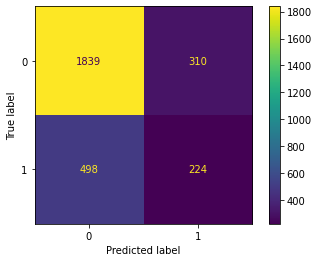

In [ ]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(modelo_knn, X_test, Y_test)  
plt.show()

Aplicaremos SMOTE para balancear los datos

In [ ]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=0)

X_sm, y_sm = sm.fit_resample(X, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (14355, 20)
Shape of X after SMOTE: (21452, 20)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: diabetes_label, dtype: float64

In [ ]:
#Podemos ver la cantidad de datos en cada categoría después de SMOTE
pd.value_counts(y_sm)

0    10726
1    10726
Name: diabetes_label, dtype: int64

Después de haber aplicado SMOTE a los datos

In [ ]:
# Dividir los datos en entrenamiento y test con SMOTE
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=0)

# Utilicemos un número de vecinos = 3
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn = modelo_knn.fit(X_train, Y_train)

y_pred_train = modelo_knn.predict(X_train)
y_pred_test = modelo_knn.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.89
Exactitud sobre test: 0.79


In [ ]:
# Mostrar reporte de clasificación sobre test SMOTE
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.64      0.76      2151
           1       0.72      0.94      0.82      2140

    accuracy                           0.79      4291
   macro avg       0.82      0.79      0.79      4291
weighted avg       0.82      0.79      0.79      4291



In [ ]:
# Mostrar reporte de clasificación sobre entrenamiento SMOTE
print(classification_report(Y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      8575
           1       0.83      0.98      0.90      8586

    accuracy                           0.89     17161
   macro avg       0.90      0.89      0.89     17161
weighted avg       0.90      0.89      0.89     17161



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


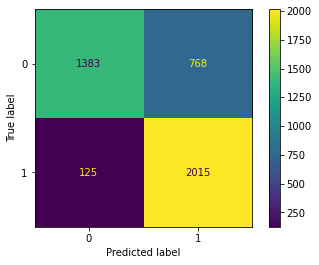

In [ ]:
# Se puede visualizar la matriz de confusión CON SMOTE
plot_confusion_matrix(modelo_knn, X_test, Y_test)  
plt.show()


### 4.1. Construcción del modelo con búsqueda de hiperparámetros


In [ ]:
# Primero definamos el espacio de búsqueda
n_vecinos =  list(range(1,11))
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [ ]:
param_grid = {'n_neighbors': n_vecinos, 'p': [1, 2]} #1 Manhattan, 2 euclidiana

In [ ]:
clasificadorKNN = KNeighborsClassifier()
modelo_Knn = GridSearchCV(clasificadorKNN, param_grid, cv=particiones)
modelo_Knn.fit(X_train,Y_train) 
print("Mejor parámetro: {}".format(modelo_Knn.best_params_)) 
print("Mejor cross-validation score: {:.2f}".format(modelo_Knn.best_score_))

Mejor parámetro: {'n_neighbors': 2, 'p': 1}
Mejor cross-validation score: 0.82


In [ ]:
# Obtener el mejor modelo.
modelo_final = modelo_Knn.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = modelo_final.predict(X_train)
y_pred_test = modelo_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.98
Exactitud sobre test: 0.84


In [ ]:
# Mostrar reporte de clasificación sobre test
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      2151
           1       0.81      0.89      0.85      2140

    accuracy                           0.84      4291
   macro avg       0.84      0.84      0.84      4291
weighted avg       0.84      0.84      0.84      4291



In [ ]:
# Mostrar reporte de clasificación sobre entrenamiento
print(classification_report(Y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      8575
           1       1.00      0.95      0.98      8586

    accuracy                           0.98     17161
   macro avg       0.98      0.98      0.98     17161
weighted avg       0.98      0.98      0.98     17161



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


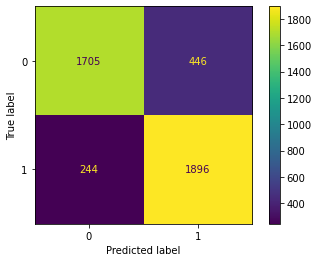

In [ ]:
# Se puede visualizar la matriz de confusión CON SMOTE con el mejor modelo y parámetros
plot_confusion_matrix(modelo_Knn, X_test, Y_test)  
plt.show()


### 5. Constrrucción del modelo con Random Forest

In [ ]:
# Se selecciona la variable objetivo, en este caso "diabetes_label".
Y = datos_m['diabetes_label']
# Del conjunto de datos se elimina la variable "diabetes_label"
X = datos_m.drop(['diabetes_label'], axis=1)

Para balancear los datos aplicamos la técnica de SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (14355, 17)
Shape of X after SMOTE: (22294, 17)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: diabetes_label, dtype: float64

In [ ]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Accuracy = 0.78
Recall = 0.24



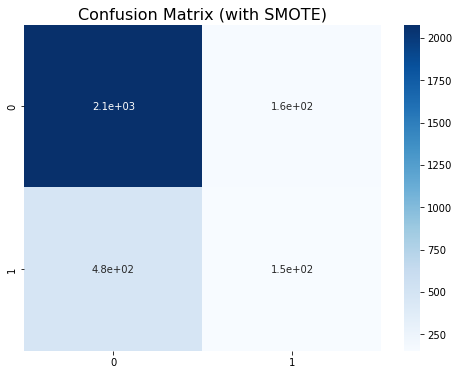

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train, Y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(Y_test, preds):.2f}\nRecall = {recall_score(Y_test, preds):.2f}\n')
cm = confusion_matrix(Y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [ ]:
# Obtenemos la matríz de confusión
confusion_matrix(Y_test, preds)

array([[2078,  162],
       [ 479,  152]])

(array([[2557.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          314.],
        [2240.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          631.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

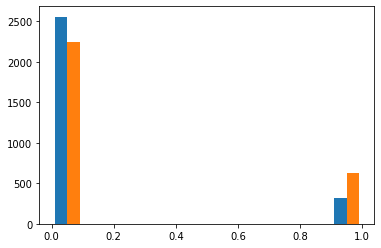

In [ ]:
#Graficamos el historiograma
plt.hist([preds, Y_test])

In [ ]:
# Calculemos también las métricas de rendimiento sobre el conjunto de entrenamiento.
print('Exactitud: %.2f' % accuracy_score(Y_test, preds))
print("Recall: {}".format(recall_score(Y_test,preds)))
print("Precisión: {}".format(precision_score(Y_test,preds)))
print("Puntuación F1: {}".format(f1_score(Y_test,preds)))

Exactitud: 0.78
Recall: 0.24088748019017434
Precisión: 0.4840764331210191
Puntuación F1: 0.3216931216931217


### Interrpretación del modelo. Aplica para Random Forest

In [ ]:
# Obtener la importancia de las variables. Para esto podemos utilizar uno de los atributos del modelo "feature_importances_", el
# cual nos devuelve un coeficiente o peso para cada atributo: mientras más grande sea este más importante será la variable
# asociada.
importancia = model.feature_importances_
importancia

array([0.05225787, 0.04037805, 0.18805886, 0.03319484, 0.01854782,
       0.03109244, 0.0307381 , 0.03399113, 0.02961056, 0.00940315,
       0.01357441, 0.11399943, 0.10806402, 0.03157328, 0.03242199,
       0.12754504, 0.10554901])

In [ ]:
# importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = pd.DataFrame(data={"Atributo": X_train.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,BMI,0.188059
1,Age,0.127545
2,MentHlth,0.113999
3,PhysHlth,0.108064
4,Income,0.105549
5,HighBP,0.052258
6,HighChol,0.040378
7,Fruits,0.033991
8,Smoker,0.033195
9,Sex,0.032422


In [ ]:
# Además, podemos visualizar el árbol relacionado con RRandom Forest.
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(model, max_depth=3, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)

<Figure size 1800x720 with 0 Axes>